<a href="https://colab.research.google.com/github/arpanavvari/Enhancing-CNN-Based-Emotion-Detection/blob/main/Enhancing_CNN_Based_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install tensor flow
!pip install numpy
!pip install pandas
!pip install keras
!pip install adam
!pip install kwargs
!pip install cinit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 820.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 2.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs
  Preparing metadata (setup.py) ... done
  Created wheel for cinit: filename=cinit-0.1.0-py3-none-any.whl size=2468 sha256=fc4a53ca55191e570668d48c6f9b796797c1837fb79b49

In [4]:
%%capture
!pip install scikit-plot

In [5]:
import sys, os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
#from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
pip install kaggle


In [7]:
import os
import pandas as pd
import zipfile

# Step 1: Set up Kaggle API credentials (place 'kaggle.json' in '~/.kaggle/')
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
kaggle_json_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Step 2: Download the dataset
!kaggle datasets download -d deadskull7/fer2013 -p .

# Step 3: Unzip the dataset
with zipfile.ZipFile('fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall('fer2013_data')

# Step 4: Read the CSV file into a DataFrame
csv_file_path = 'fer2013_data/fer2013.csv'
data = pd.read_csv(csv_file_path)

# Step 5: Display the DataFrame
data.head()


Dataset URL: https://www.kaggle.com/datasets/deadskull7/fer2013
License(s): CC0-1.0
 95% 92.0M/96.6M [00:00<00:00, 254MB/s]
100% 96.6M/96.6M [00:00<00:00, 240MB/s]


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
print(data.info())
print(data["Usage"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


**Data pre-processing**

In [10]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] ,
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Shuffling the data

In [11]:
data = data.sample(frac=1)

One Hot Encoding

Then, we will do one hot encoding operation to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.

In [12]:
labels = to_categorical(data[['emotion']], num_classes=7)


Changing image pixels to Numpy array

In [13]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

Standardization

In [14]:
pixels = train_pixels.reshape((35887*2304,1))

In [15]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

Reshaping the data (48,48)

In [16]:
pixels = train_pixels.reshape((35887, 48, 48,1))

Train test validation split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


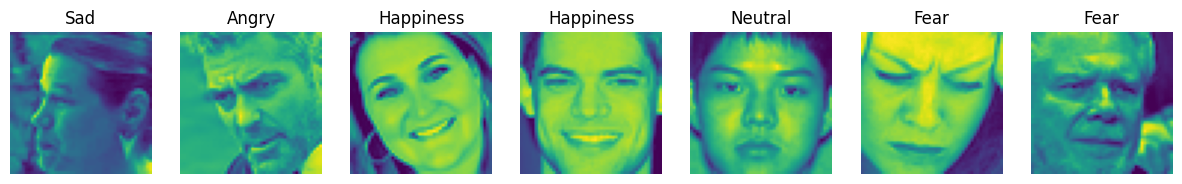

In [19]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

Data augmentation using ImageDataGenerator

In [20]:
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)

In [21]:
datagen.fit(X_train)
valgen.fit(X_val)

In [22]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

**Design a model:**

CNN model

In [23]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model

In [24]:
model = cnn_model()

In [25]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

Early stopping

In [27]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [29]:
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/10
455/455 [==============================] - ETA: 0s - loss: 2.6414 - accuracy: 0.4255
Epoch 1: val_accuracy improved from 0.28854 to 0.36873, saving model to best_model.h5
455/455 [==============================] - 133s 293ms/step - loss: 2.6414 - accuracy: 0.4255 - val_loss: 2.8772 - val_accuracy: 0.3687
Epoch 2/10
455/455 [==============================] - ETA: 0s - loss: 2.5767 - accuracy: 0.4509
Epoch 2: val_accuracy did not improve from 0.36873
455/455 [==============================] - 133s 292ms/step - loss: 2.5767 - accuracy: 0.4509 - val_loss: 2.6495 - val_accuracy: 0.3591
Epoch 3/10
455/455 [==============================] - ETA: 0s - loss: 2.4361 - accuracy: 0.4722
Epoch 3: val_accuracy improved from 0.36873 to 0.41146, saving model to best_model.h5
455/455 [==============================] - 134s 294ms/step - loss: 2.4361 - accuracy: 0.4722 - val_loss: 2.6587 - val_accuracy: 0.4115
Epoch 4/10
455/455 [==============================] - ETA: 0s - loss: 2.3956 - accur

Visualizing results

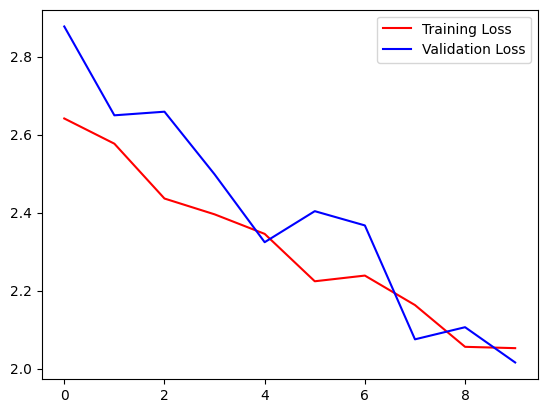

In [30]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

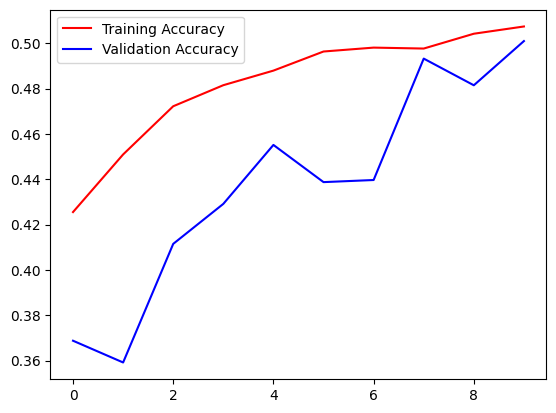

In [31]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [32]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 4s 31ms/step - loss: 1.9341 - accuracy: 0.5389
Test Acc: 0.53886878490448


In [33]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 4s 31ms/step


Model Accuracy: Achieved 53.9% test accuracy with improving trends in training and validation accuracy.

Class Imbalance: Poor performance for certain classes due to class imbalance, indicated by low recall and F1-scores.

Recommendations: Implement data augmentation, regularization, class balancing strategies, and experiment with different model architectures and hyperparameters.

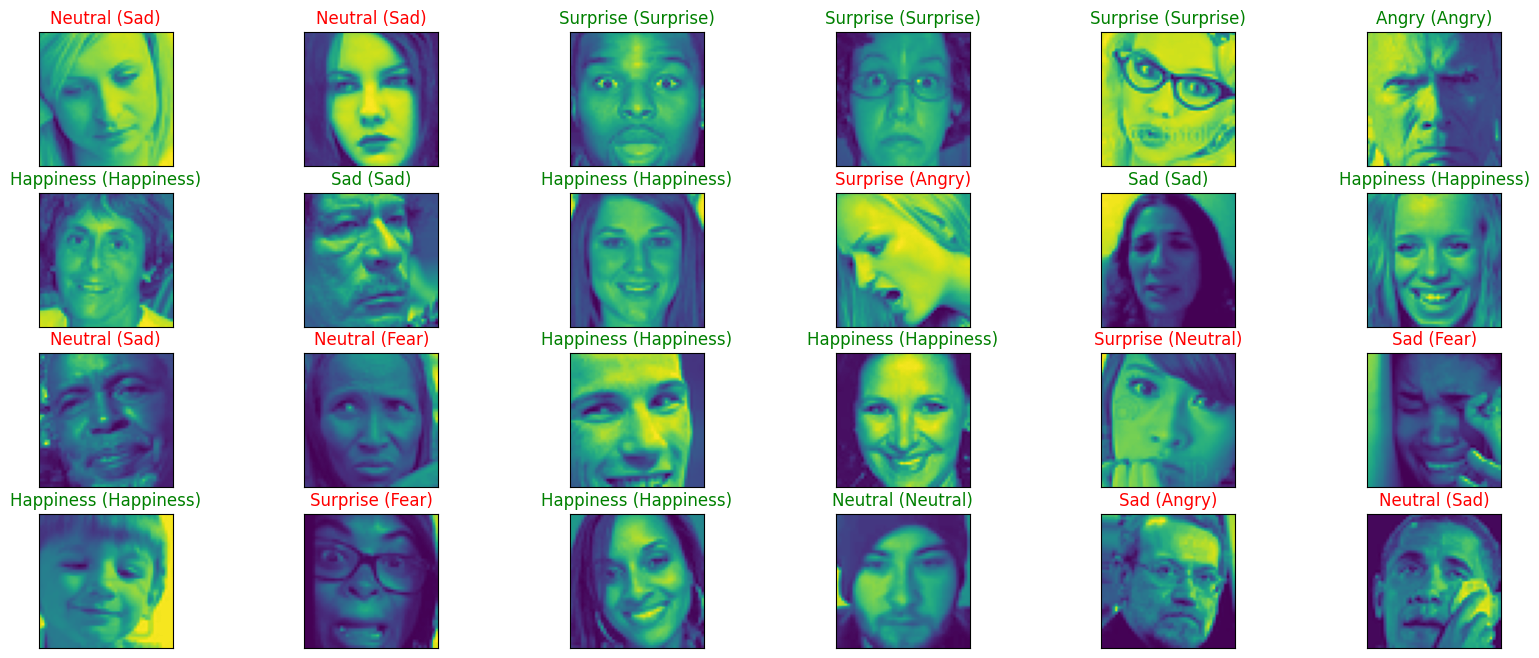

In [34]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

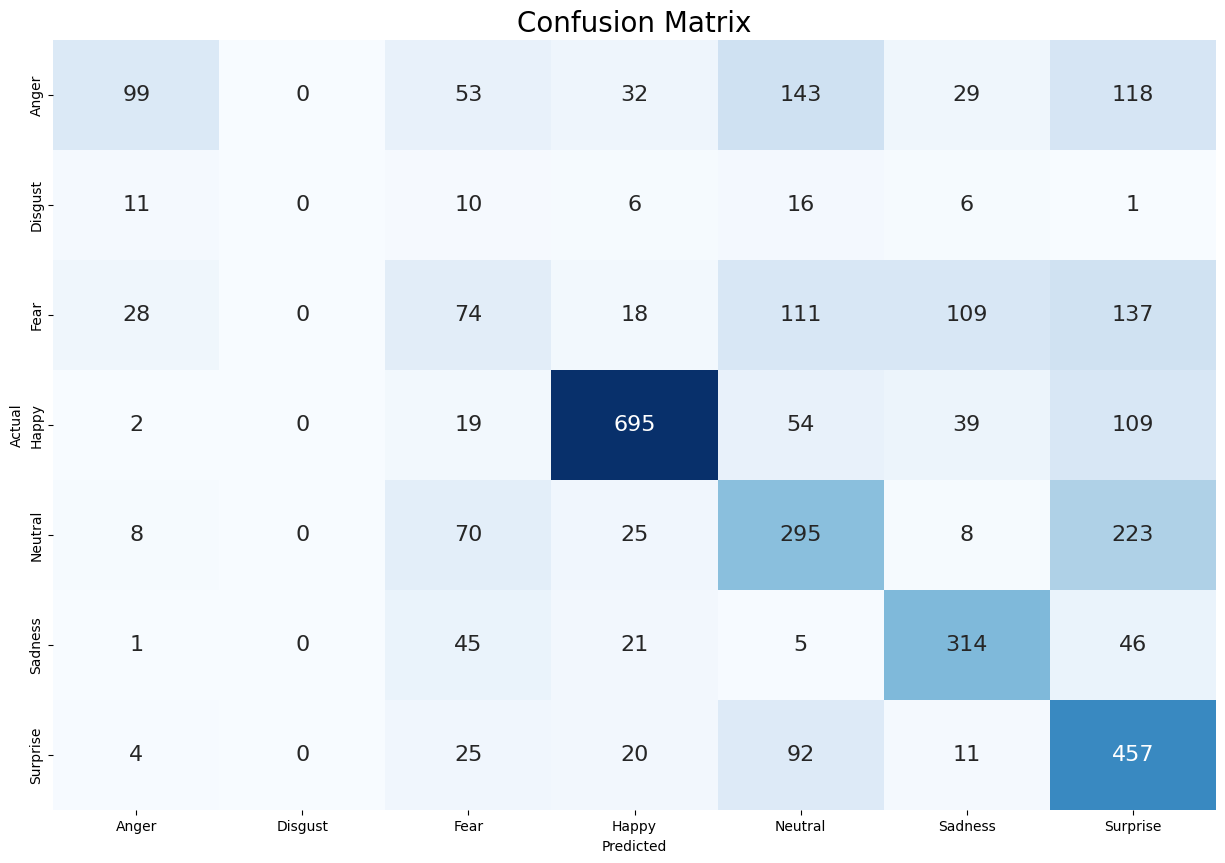

In [35]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.647     0.209     0.316       474
           1      0.000     0.000     0.000        50
           2      0.250     0.155     0.191       477
           3      0.851     0.757     0.801       918
           4      0.412     0.469     0.439       629
           5      0.609     0.727     0.662       432
           6      0.419     0.750     0.538       609

    accuracy                          0.539      3589
   macro avg      0.455     0.438     0.421      3589
weighted avg      0.553     0.539     0.520      3589



Achieved 53.9% test accuracy, with strong performance in Class 3 but poor results in Classes 1 and 2 due to imbalance. Recommendations include data augmentation, regularization, and class balancing strategies to improve overall performance.

**Fine Tuning **

Changing optimizer

In [37]:
model = cnn_model()

In [38]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [40]:
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/10
455/455 [==============================] - ETA: 0s - loss: 14.7471 - accuracy: 0.1659
Epoch 1: val_accuracy did not improve from 0.50093
455/455 [==============================] - 132s 291ms/step - loss: 14.7471 - accuracy: 0.1659 - val_loss: 13.9714 - val_accuracy: 0.2192
Epoch 2/10
455/455 [==============================] - ETA: 0s - loss: 14.3385 - accuracy: 0.1790
Epoch 2: val_accuracy did not improve from 0.50093
455/455 [==============================] - 132s 291ms/step - loss: 14.3385 - accuracy: 0.1790 - val_loss: 13.7115 - val_accuracy: 0.2393
Epoch 3/10
455/455 [==============================] - ETA: 0s - loss: 14.0150 - accuracy: 0.1898
Epoch 3: val_accuracy did not improve from 0.50093
455/455 [==============================] - 131s 289ms/step - loss: 14.0150 - accuracy: 0.1898 - val_loss: 13.5157 - val_accuracy: 0.2433
Epoch 4/10
455/455 [==============================] - ETA: 0s - loss: 13.7314 - accuracy: 0.1927
Epoch 4: val_accuracy did not improve from 0.500

In [41]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 4s 31ms/step - loss: 12.0403 - accuracy: 0.2800
Test Acc: 0.2800222933292389


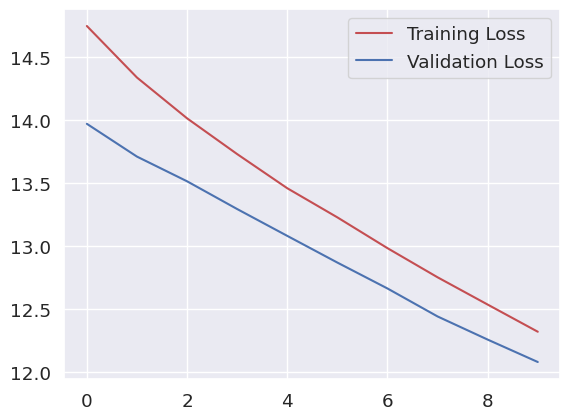

In [42]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

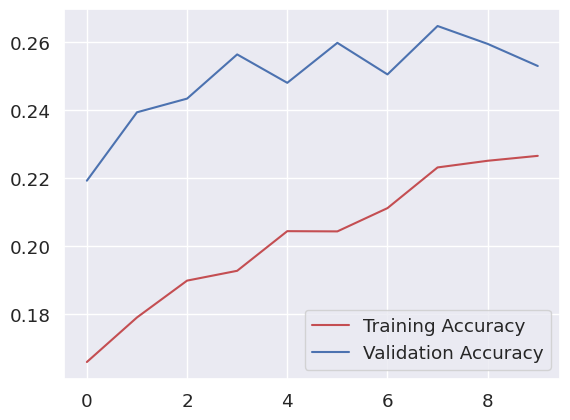

In [43]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

Changing epoch number

In [44]:
model = cnn_model()

In [45]:

model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [46]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 10),
                              ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                              save_best_only=True,mode="max")]

In [49]:
history = model.fit(train_generator,
                    epochs=20,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/20
455/455 [==============================] - ETA: 0s - loss: 2.1755 - accuracy: 0.5032
Epoch 1: val_accuracy did not improve from 0.47430
455/455 [==============================] - 128s 282ms/step - loss: 2.1755 - accuracy: 0.5032 - val_loss: 2.4809 - val_accuracy: 0.4449
Epoch 2/20
455/455 [==============================] - ETA: 0s - loss: 2.1674 - accuracy: 0.5093
Epoch 2: val_accuracy improved from 0.47430 to 0.50062, saving model to best_model.h5
455/455 [==============================] - 129s 285ms/step - loss: 2.1674 - accuracy: 0.5093 - val_loss: 2.1566 - val_accuracy: 0.5006
Epoch 3/20
455/455 [==============================] - ETA: 0s - loss: 2.0530 - accuracy: 0.5170
Epoch 3: val_accuracy did not improve from 0.50062
455/455 [==============================] - 129s 284ms/step - loss: 2.0530 - accuracy: 0.5170 - val_loss: 2.2701 - val_accuracy: 0.4824
Epoch 4/20
455/455 [==============================] - ETA: 0s - loss: 2.1183 - accuracy: 0.5124
Epoch 4: val_accuracy i

In [50]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 4s 31ms/step - loss: 1.5820 - accuracy: 0.5868
Test Acc: 0.5867930054664612


In [51]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 4s 31ms/step


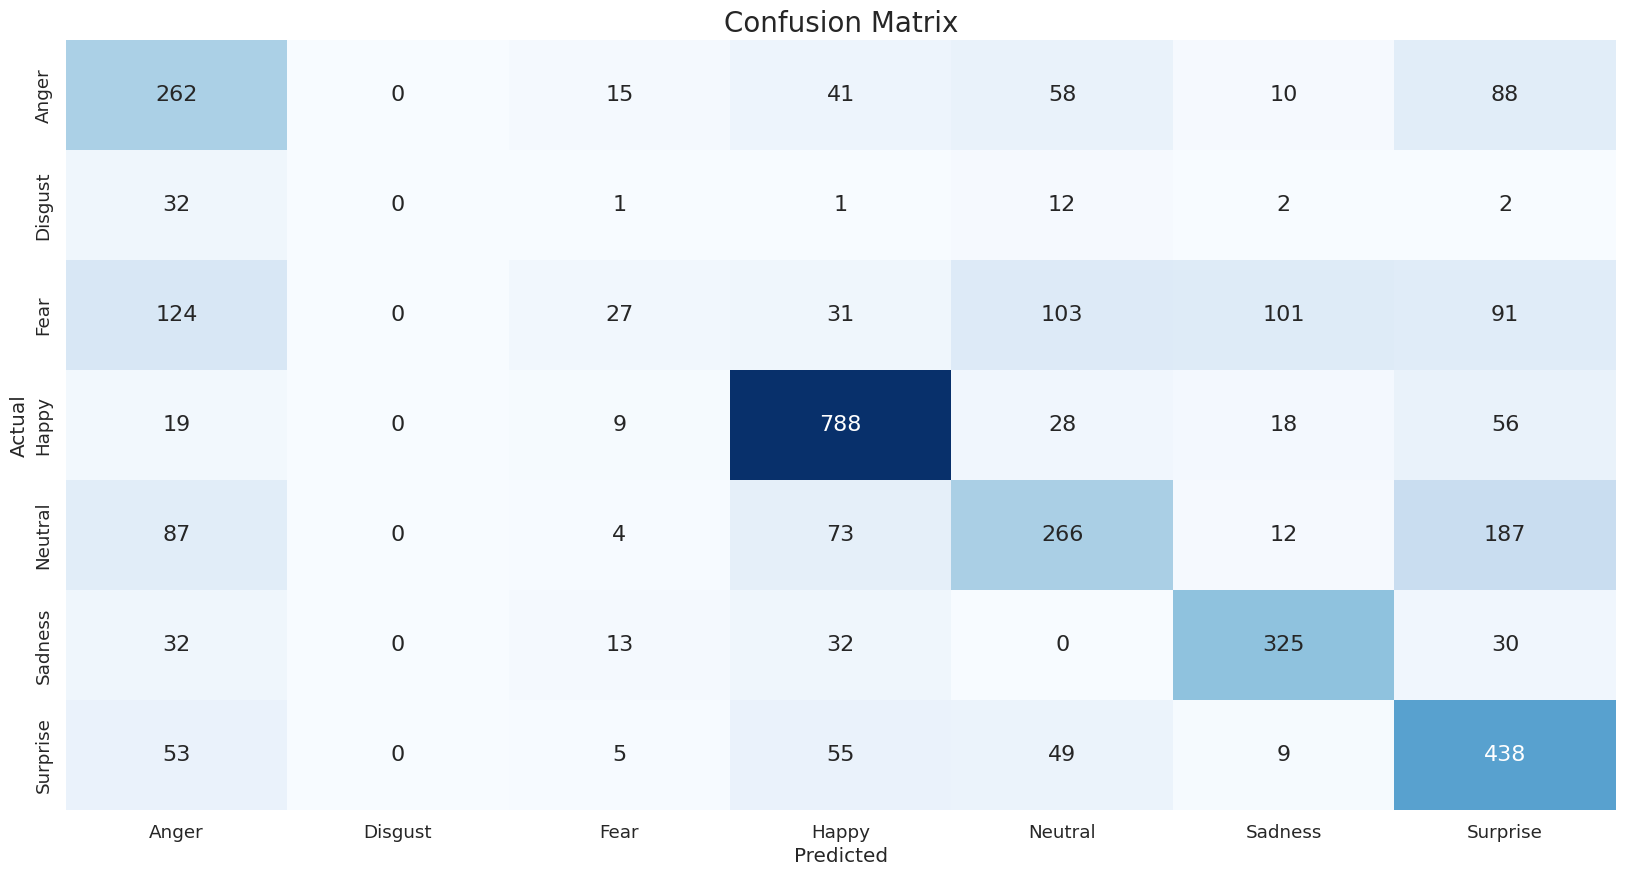

In [52]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [53]:
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.430     0.553     0.484       474
           1      0.000     0.000     0.000        50
           2      0.365     0.057     0.098       477
           3      0.772     0.858     0.813       918
           4      0.516     0.423     0.465       629
           5      0.681     0.752     0.715       432
           6      0.491     0.719     0.584       609

    accuracy                          0.587      3589
   macro avg      0.465     0.480     0.451      3589
weighted avg      0.558     0.587     0.551      3589



This project uses Convolutional Neural Networks (CNN) to detect emotions from images, achieving a test accuracy of 58.7%. It highlights the need for data augmentation, regularization, and class balancing to improve performance, especially for underrepresented classes.